In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Problem / Objective: 

Predict / Estimate the insurance costs of indivduals given a few details of theirselves. 

#Get Data

In [ ]:
dataset = 'insurance.csv'

In [ ]:
df = pd.read_csv(dataset)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


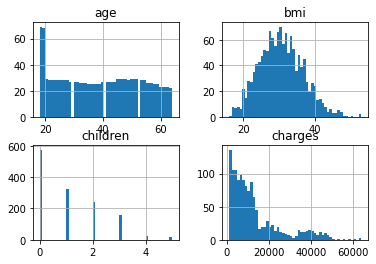

In [ ]:
df.hist(bins=50)
plt.show()

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#Create a Test Set

In [ ]:
X_train, x_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df.region)

#Explore the Data

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

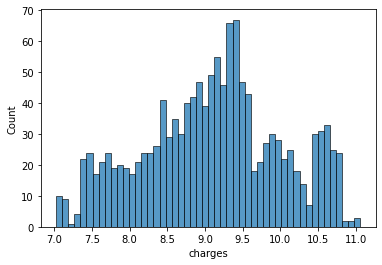

In [ ]:
charges_logs = np.log1p(df_copy.charges)
sns.histplot(charges_logs, bins=50)

In [ ]:
#Check for correlations
corr_matrix = df_copy.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [ ]:
#Check Risk Ratio 
global_mean = df.charges.mean()
global_mean

13270.422265141257

In [ ]:
from IPython.display import display
categorical = ['sex','smoker','region']
for col in categorical:
  df_group = df.groupby(by=col).charges.agg(['mean'])
  df_group['diff'] = df_group['mean'] - global_mean
  df_group['risk'] = df_group['mean'] / global_mean
  display(df_group)

,mean,diff,risk
sex,,,
female,12569.578844,-700.843421,0.947188
male,13956.751178,686.328913,1.051719


,mean,diff,risk
smoker,,,
no,8434.268298,-4836.153967,0.635569
yes,32050.231832,18779.809566,2.415163


,mean,diff,risk
region,,,
northeast,13406.384516,135.962251,1.010246
northwest,12417.575374,-852.846891,0.935733
southeast,14735.411438,1464.989172,1.110395
southwest,12346.937377,-923.484888,0.930410


All but one of the features do not give very interesting insight except for smoking as we see you are 2.4 times likely to pay higher insurance costs if you smoke compared to if you do not. 

#Prepare the data

In [ ]:
#Log the target variable 
y_train = np.log1p(X_train.charges)
y_test = np.log1p(x_test.charges)

In [ ]:
del X_train['charges']
del x_test['charges']

In [ ]:
X_train_dict = X_train.to_dict(orient='records')
X_train_dict[0]

{'age': 51,
 'bmi': 24.415,
 'children': 4,
 'region': 'northwest',
 'sex': 'male',
 'smoker': 'no'}

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(X_train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train_df = dv.transform(X_train_dict)

In [ ]:
dv.get_feature_names_out()

array(['age', 'bmi', 'children', 'region=northeast', 'region=northwest',
       'region=southeast', 'region=southwest', 'sex=female', 'sex=male',
       'smoker=no', 'smoker=yes'], dtype=object)

#ML Model - Linear Regression 

In [ ]:
model = LinearRegression()
model.fit(X_train_df, y_train)

LinearRegression()

In [ ]:
model.score(X_train_df, y_train)

0.7634372596598131

In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 7.710948705470939
slope: [ 0.03514822  0.01221976  0.09890681  0.10430533  0.00672282 -0.08809437
 -0.02293378  0.02620756 -0.02620756 -0.78135614  0.78135614]


In [ ]:
x_test_dict = x_test.to_dict(orient='records')
x_test_df = dv.transform(x_test_dict)

In [ ]:
x = model.predict(x_test_df)

In [ ]:
rmse = mean_squared_error(x, y_test, squared=False)
rmse

0.42395527039925324

# Test the model 

In [ ]:
sample = df.sample(1)
sample

,age,sex,bmi,children,smoker,region,charges
857,25,male,24.13,0,yes,northwest,15817.9857


In [ ]:
test = sample.copy()
del test['charges']
test = test.to_dict(orient='records')
test = dv.transform(test)

In [ ]:
test = model.predict(test)

In [ ]:
np.expm1(test[0])

15464.831236397917